In [ ]:
#한글 폰트 깨짐현상 해결을 위한 나눔글꼴 설치
#설치 후 런타임 다시 시작
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
!pip install eli5

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-470
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
import pandas as pd
import numpy as np
import os
import sys
from datetime import datetime
import datetime
import seaborn as sns
%matplotlib inline  
import matplotlib as mpl  
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm  
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')


import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
#Classifier 패키지
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
#Regressor 패키지
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
#모델 평가 패키지
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#feature importance 계산 및 시각화
import eli5
from eli5.sklearn import PermutationImportance 

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/pretest_data.csv',header=0,parse_dates=['published_date','on_trending_date','off_trending_date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   video_id                  2644 non-null   object        
 1   channel_id                2644 non-null   object        
 2   published_date            2644 non-null   datetime64[ns]
 3   category_name             2644 non-null   object        
 4   duration                  2644 non-null   object        
 5   tags                      2274 non-null   object        
 6   description               2604 non-null   object        
 7   on_trending_date          2644 non-null   datetime64[ns]
 8   off_trending_date         2644 non-null   datetime64[ns]
 9   on_rank                   2644 non-null   int64         
 10  off_rank                  2644 non-null   int64         
 11  on_views                  2644 non-null   int64         
 12  off_views           

In [ ]:
df.head(6)

,video_id,channel_id,published_date,category_name,duration,tags,description,on_trending_date,off_trending_date,on_rank,off_rank,on_views,off_views,on_likes,off_likes,on_dislikes,off_dislikes,on_comments,off_comments,on_channel_subscribers,off_channel_subscribers,on_channel_total_views,off_channel_total_views,on_channel_total_videos,off_channel_total_videos
0,V-0db,CH49ta0,2021-07-01,Entertainment,PT8M20S,SiriusXM|Sirius XM|Sirius|SXM|BIGHIT|빅히트|방탄소년단...,BTS performs their hit songs ‘Dynamite’ and ‘B...,2021-07-03,2021-07-04,13,28,1659484,1912983,270004,282204,792,1014,10373,10720,1080000,1080000,685992413,687485021,5947,5950
1,V-1XL,CHZVD--,2021-06-24,Entertainment,PT9M17S,치킨불냉면|치킨|불냉면|냉면,영상에 나오는 캐릭터의 이름은 파도비 입니다. 고양이가 아니라 파란 도깨비입니다. ...,2021-06-26,2021-06-27,28,45,293559,374698,7121,8165,121,154,1083,1173,627000,628000,75327083,75685030,70,70
2,V-4fa,CH9w-h_,2021-07-17,Entertainment,PT7M39S,NaN,"거세 구형, 성 충동 제거를 위한 엄벌 치료 VS 인권 보호해야고민 끝에 내린 강요...",2021-07-19,2021-07-22,1,23,451260,757265,3994,5684,162,233,696,1006,5750000,5750000,5424167911,5431617741,34270,34341
3,V-5ip,CHUQVGX,2021-06-02,Sports,PT6M40S,News Network|SBS SPORTSMUG|SPORTSMUG|스포츠머그|축구|...,세계 최초 9회 연속 올림픽 본선 진출! 그동안 한국 축구의 역사를 써내려 간 올림...,2021-06-04,2021-06-04,18,18,216446,216446,1158,1158,30,30,416,416,94200,94200,71160125,71160125,224,224
4,V-5jn,CHhI3EX,2021-07-06,Sports,PT11M27S,이천수|심판도전기|축구심판,찾아 뵐 심판분들이 이제 18명정도 남았네요,2021-07-08,2021-07-09,11,29,631598,829677,3839,4494,112,143,687,772,47600,49200,6993451,7607123,21,21
5,V-6aV,CHaO6TY,2021-06-28,Music,PT3M41S,JYP Entertainment|JYP|2PM|투피엠|2PM Teaser Video...,2PM 해야 해 M/V2PM THE 7TH ALBUM ＜MUST＞iTunes & A...,2021-06-30,2021-06-30,14,14,10638842,10638842,442766,442766,1993,1993,38182,38182,21200000,21200000,13309923510,13309923510,1297,1297


In [ ]:
print("데이터 전체 Row 수:",len(df))
print("결측값 집계:", dict(df.isnull().sum()))
print("중복값 집계:", dict(df.nunique()))

데이터 전체 Row 수: 2644
결측값 집계: {'video_id': 0, 'channel_id': 0, 'published_date': 0, 'category_name': 0, 'duration': 0, 'tags': 370, 'description': 40, 'on_trending_date': 0, 'off_trending_date': 0, 'on_rank': 0, 'off_rank': 0, 'on_views': 0, 'off_views': 0, 'on_likes': 0, 'off_likes': 0, 'on_dislikes': 0, 'off_dislikes': 0, 'on_comments': 0, 'off_comments': 0, 'on_channel_subscribers': 0, 'off_channel_subscribers': 0, 'on_channel_total_views': 0, 'off_channel_total_views': 0, 'on_channel_total_videos': 0, 'off_channel_total_videos': 0}
중복값 집계: {'video_id': 2643, 'channel_id': 940, 'published_date': 127, 'category_name': 15, 'duration': 1200, 'tags': 1978, 'description': 2492, 'on_trending_date': 127, 'off_trending_date': 122, 'on_rank': 50, 'off_rank': 50, 'on_views': 2642, 'off_views': 2642, 'on_likes': 2479, 'off_likes': 2515, 'on_dislikes': 767, 'off_dislikes': 936, 'on_comments': 1920, 'off_comments': 2001, 'on_channel_subscribers': 1319, 'off_channel_subscribers': 1315, 'on_channel_t

# 1. EDA (Exploratory Data Analysis)

해당 데이터셋은 2,644행으로 이루어진 데이터셋으로 결측값은 `'tags'`와 `'description'`에만 존재하는 것을 확인하였다.

이 데이터의 출처가 'Youtube' 메인 페이지 "탐색/인기" 섹션에서 기초한 만큼 시청자들이 많거나, 사회 현상 또는 트렌드에 따라 영상이 해당 섹션에 걸려질 것으로 예상된다. 특히 시청자들이 많은 채널의 경우 수익을 목적으로 영상을 제작하는 'YouTuber' 채널이 "탐색/인기" 섹션에 많이 올라갈 것이라고 판단하였다. 따라서 중복 채널을 집계한 결과, 2,644개의 영상 중 **약 35.6%인 940개 채널**에서 "탐색/인기" 섹션에 게재된 영상들을 제작하였음을 알 수 있었다.

`'category_id'`는 총 **15개**가 존재하며, 눈에 띄게 중복값이 적은 column 중에 `'published_date'`, `'on_trending_date'`와 `'off_trending_date'`를 살펴볼 수 있는데 영상이 유튜브에 업로드된 날짜 127개, 인기 동영상에서 처음 포착된 날짜와 사라진 날짜가 127개, 122개로 자세한 값은 출력해봐야 알겠지만 "탐색/인기" 섹션에 오르는데 있어서 이 3가지가 상관관계가 있을 것으로 판단된다.


# 2. Q1 데이터 타입별 시각화

해당 데이터셋을 살펴보면, `'publish_date'`, `'on_trending_date'`, `'off_trending_date'`의 
경우 날짜 데이터이므로 `datetime` 으로의 데이터 변환이 필요함. 
또한 월별 및 주별 데이터를 구분해야하기 때문에 `'month'` 와 `'weekly'` 열의 생성이 필요함.
*   `'publish_date'`, `'on_trending_date'`, `'off_trending_date'` 의 column의 데이터 타입을 pd.datetime으로 변경 필요
*   `'month'`, `'weekly'` column의 추가
*  `'day_of_week'` 라는 column을 추가하여 요일과 관련된 내용 추가

In [ ]:
#month,weekly column의 추가
q1_dataset=df[['video_id','channel_id','category_name','published_date','on_trending_date','off_trending_date','tags']]
q1_dataset['month'] = pd.DatetimeIndex(q1_dataset['published_date']).month
q1_dataset['weekly'] =[(date-datetime.timedelta(days=date.dayofweek)).strftime("%Y-%m-%d") for date in q1_dataset['published_date']] #주별(월요일 기준)
q1_dataset['day_of_week']=[date.dayofweek for date in q1_dataset['published_date']] #월요일부터 0!
colors=['lightcoral', 'darkorange', 'darkslategray', 'indianred', 'cornflowerblue', 'orchid', 'limegreen', 'gold', 'teal', 'mediumpurple', 'coral', 'mediumaquamarine', 'sandybrown', 'darkgoldenrod', 'indigo']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [ ]:
q1_dataset.head()

,video_id,channel_id,category_name,published_date,on_trending_date,off_trending_date,tags,month,weekly,day_of_week
0,V-0db,CH49ta0,Entertainment,2021-07-01,2021-07-03,2021-07-04,SiriusXM|Sirius XM|Sirius|SXM|BIGHIT|빅히트|방탄소년단...,7,2021-06-28,3
1,V-1XL,CHZVD--,Entertainment,2021-06-24,2021-06-26,2021-06-27,치킨불냉면|치킨|불냉면|냉면,6,2021-06-21,3
2,V-4fa,CH9w-h_,Entertainment,2021-07-17,2021-07-19,2021-07-22,NaN,7,2021-07-12,5
3,V-5ip,CHUQVGX,Sports,2021-06-02,2021-06-04,2021-06-04,News Network|SBS SPORTSMUG|SPORTSMUG|스포츠머그|축구|...,6,2021-05-31,2
4,V-5jn,CHhI3EX,Sports,2021-07-06,2021-07-08,2021-07-09,이천수|심판도전기|축구심판,7,2021-07-05,1


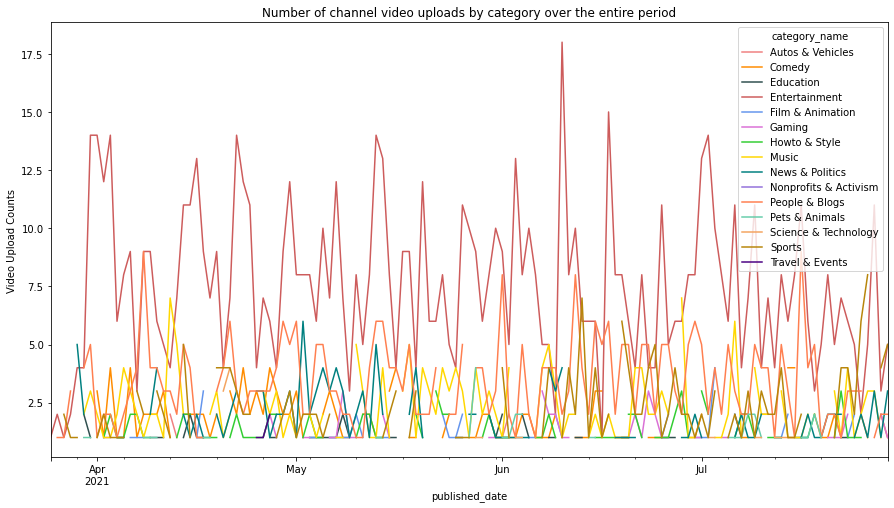

In [ ]:
#전체 기간동안의 카테고리별 채널 비디오 업로드 수
fig, ax=plt.subplots(figsize=(15,8))
ax.set_ylabel('Video Upload Counts')
ax.set_title('Number of channel video uploads by category over the entire period')
q1_dataset.groupby(['published_date','category_name'])['video_id'].count().unstack().plot(ax=ax, color=colors)
plt.show()

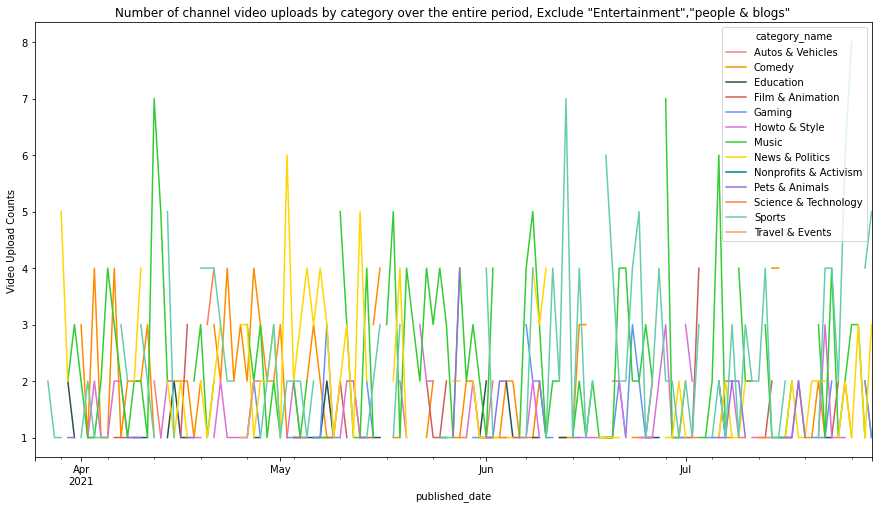

In [ ]:
# "Entertainment","people & blogs" 제외한 시각화
q1_dataset_2=q1_dataset.groupby(['published_date','category_name'])['video_id'].count().unstack()
q1_dataset_2_part=q1_dataset_2[['Autos & Vehicles','Comedy','Education','Film & Animation','Gaming','Howto & Style','Music','News & Politics','Nonprofits & Activism','Pets & Animals','Science & Technology','Sports','Travel & Events']]
fig, ax=plt.subplots(figsize=(15,8))
ax.set_ylabel('Video Upload Counts')
ax.set_title('Number of channel video uploads by category over the entire period, Exclude "Entertainment","people & blogs"')
q1_dataset_2_part.plot(ax=ax,color=colors)
plt.show()

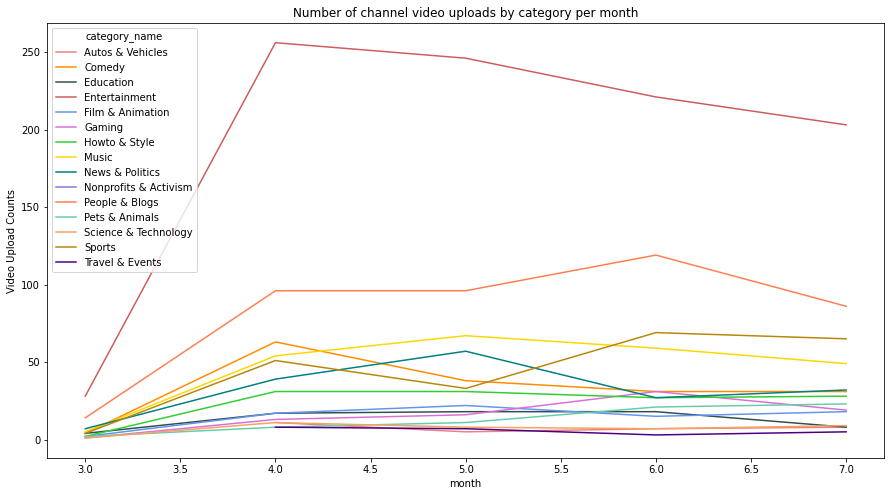

In [ ]:
#월별 카테고리별 채널 비디오 업로드 수
fig, ax=plt.subplots(figsize=(15,8))
ax.set_ylabel('Video Upload Counts')
ax.set_title('Number of channel video uploads by category per month')
q1_dataset.groupby(['month','category_name'])['video_id'].count().unstack().plot(ax=ax,color=colors)
plt.show()

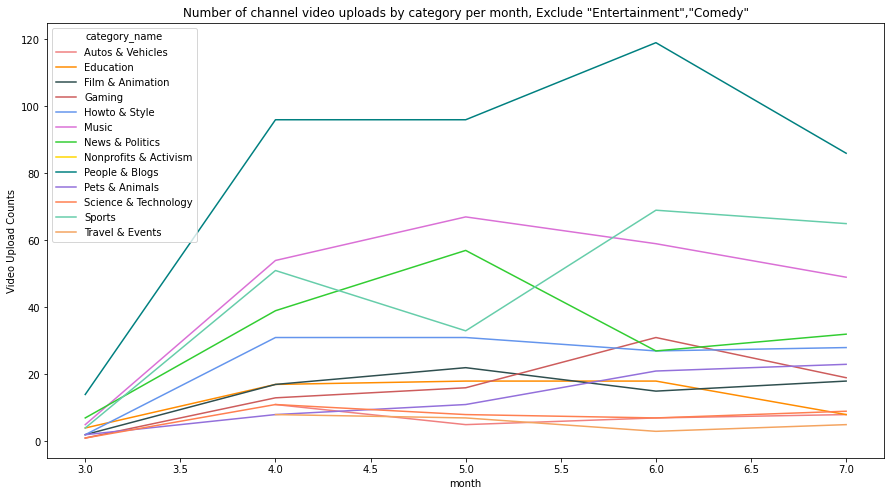

In [ ]:
#월별 카테고리별 채널 비디오 업로드 수('Entertainment','comedy'는 제외)
q1_dataset_3=q1_dataset.groupby(['month','category_name'])['video_id'].count().unstack()
q1_dataset_3_part=q1_dataset_3[['Autos & Vehicles','Education','Film & Animation','Gaming','Howto & Style','Music','News & Politics','Nonprofits & Activism','People & Blogs','Pets & Animals','Science & Technology','Sports','Travel & Events']]
fig, ax=plt.subplots(figsize=(15,8))
ax.set_ylabel('Video Upload Counts')
ax.set_title('Number of channel video uploads by category per month, Exclude "Entertainment","Comedy"')
q1_dataset_3_part.plot(ax=ax,color=colors)
plt.show()

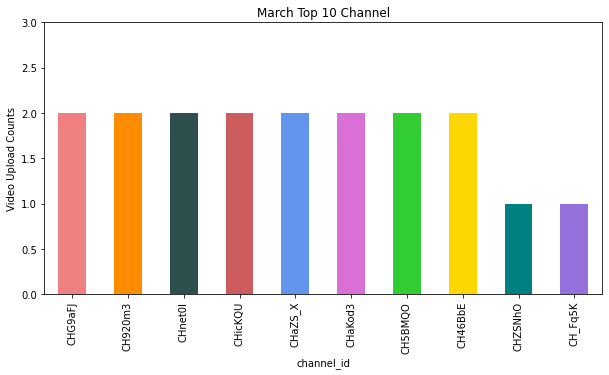

In [ ]:
#월별 TOP 10 채널
#3월
Marchdata=q1_dataset.groupby(['channel_id','month'])['video_id'].count().unstack().sort_values(by=3,ascending=False).iloc[:10,0]
Aprildata=q1_dataset.groupby(['channel_id','month'])['video_id'].count().unstack().sort_values(by=4,ascending=False).iloc[:10,1]
Maydata=q1_dataset.groupby(['channel_id','month'])['video_id'].count().unstack().sort_values(by=5,ascending=False).iloc[:10,2]
Junedata=q1_dataset.groupby(['channel_id','month'])['video_id'].count().unstack().sort_values(by=6,ascending=False).iloc[:10,3]
Julydata=q1_dataset.groupby(['channel_id','month'])['video_id'].count().unstack().sort_values(by=7,ascending=False).iloc[:10,4]
fig, ax=plt.subplots(figsize=(10,5))
ax.set_ylim([0,3])
ax.set_ylabel('Video Upload Counts')
ax.set_title('March Top 10 Channel')
Marchdata.plot.bar(ax=ax,color=colors)
plt.show()

In [ ]:
Julydata

channel_id
CHYRrUD    9.0
CHUQVGX    6.0
CH29-Il    6.0
CHk4XjB    6.0
CHszFjh    5.0
CHArK9M    5.0
CHlRNDV    5.0
CHk6bX-    4.0
CHZ0dIs    4.0
CHZ1wYQ    4.0
Name: 7, dtype: float64

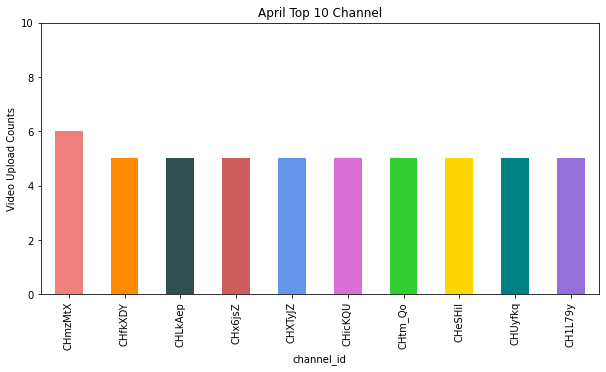

In [ ]:
#월별 TOP 10 채널
#4월
fig, ax=plt.subplots(figsize=(10,5))
ax.set_ylim([0,10])
ax.set_ylabel('Video Upload Counts')
ax.set_title('April Top 10 Channel')
Aprildata.plot.bar(ax=ax,color=colors)
plt.show()

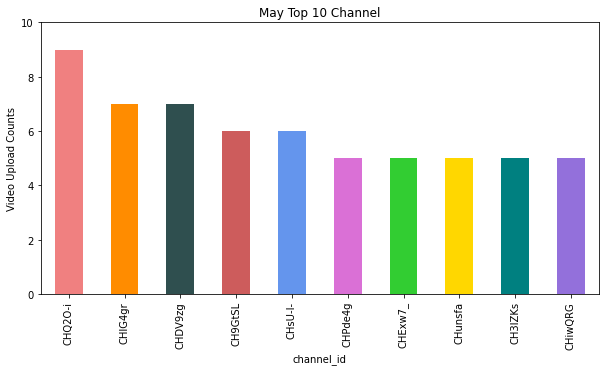

In [ ]:
#월별 TOP 10 채널
#5월
fig, ax=plt.subplots(figsize=(10,5))
ax.set_ylim([0,10])
ax.set_ylabel('Video Upload Counts')
ax.set_title('May Top 10 Channel')
Maydata.plot.bar(ax=ax,color=colors)
plt.show()

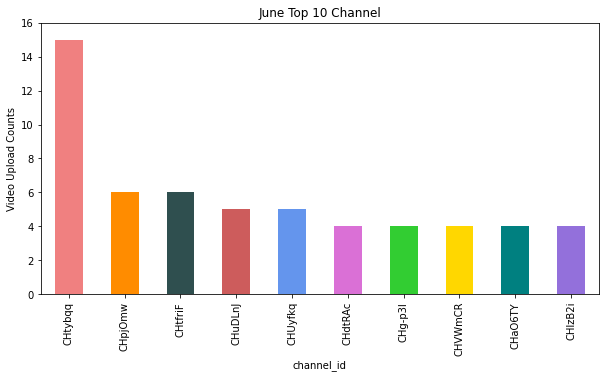

In [ ]:
#월별 TOP 10 채널
#6월
fig, ax=plt.subplots(figsize=(10,5))
ax.set_ylim([0,16])
ax.set_ylabel('Video Upload Counts')
ax.set_title('June Top 10 Channel')
Junedata.plot.bar(ax=ax,color=colors)
plt.show()

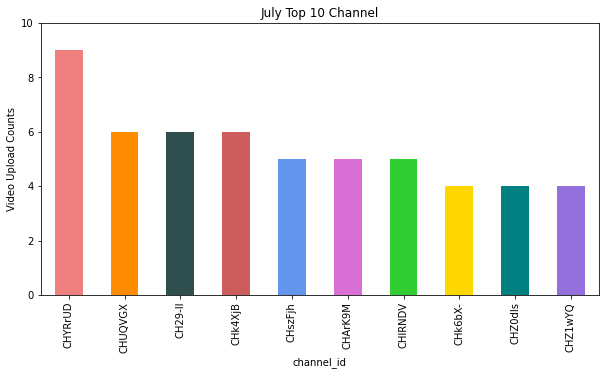

In [ ]:
#월별 TOP 10 채널
#7월
fig, ax=plt.subplots(figsize=(10,5))
ax.set_ylim([0,10])
ax.set_ylabel('Video Upload Counts')
ax.set_title('July Top 10 Channel')
Julydata.plot.bar(ax=ax,color=colors)
plt.show()

In [ ]:
#주별 Top 5 채널
q1_dataset_4=q1_dataset.groupby(['weekly','channel_id'])['video_id'].count().to_frame()
q1_dataset_4 = q1_dataset_4['video_id'].groupby('weekly', group_keys=False)
q1_dataset_4 = q1_dataset_4.apply(lambda x: x.sort_values(ascending=False).head(5)).to_frame() #동영상 수 기준으로 상위 5개만 frame에 넣었음.
q1_dataset_4=q1_dataset_4.rename(columns={'video_id':'video_count'})
print(q1_dataset_4)

                       video_count
weekly     channel_id             
2021-03-22 CHnet0I               2
           CH2qVOO               1
           CH7Krez               1
           CHCA4-e               1
           CHGiqkg               1
2021-03-29 CHaKod3               3
           CHaZS_X               3
           CH0PsUG               2
           CHcTWmz               2
           CHmzMtX               2
2021-04-05 CHmzMtX               3
           CHtm_Qo               3
           CHIA-LP               3
           CHUyfkq               2
           CHFL1sC               2
2021-04-12 CHx6jsZ               5
           CHeSHil               3
           CHMEbRp               3
           CHmONdw               3
           CH-BqPA               2
2021-04-19 CH5Ida8               3
           CHiwQRG               3
           CHGsJRp               3
           CHe9f9M               2
           CHoPTIa               2
2021-04-26 CHQ2O-i               5
           CHIG4gr  

In [ ]:
#월별 카테고리별 태그 키워드 순위
#태그 내용과 관련하여 특정문자(|) 기준으로 split
q1_dataset_5=q1_dataset[['category_name','month','tags']]
q1_dataset_5.dropna(inplace=True)
q1_dataset_5.reset_index(inplace=True)
splited=[]
for i in range(len(q1_dataset_5['tags'])):
  splited.append(q1_dataset_5.loc[i,'tags'].split('|'))
q1_dataset_5['tags']=splited
q1_dataset_5=q1_dataset_5.set_index(['month','category_name'])
q1_dataset_5.sort_index(level=0,inplace=True)
q1_dataset_5.drop('index',axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [ ]:
#월별 카테고리별 키워드 순위
cate=['Comedy', 'Education', 'Entertainment', 'Film & Animation','Gaming', 'Howto & Style', 'Music', 'News & Politics','People & Blogs', 'Pets & Animals', 'Science & Technology','Sports', 'Autos & Vehicles', 'Travel & Events','Nonprofits & Activism']
def Rank_Keyword(df,month):
  for name in cate:
    try:
      val=df.loc[(month,name)].values
      a=dict()
      for i in range(len(val)):
        word_line= val[i][0]
        for word in range(len(word_line)):
          a[word_line[word]] = a.get(word_line[word],0)+1
      a=list(sorted(a.items(),key=lambda x:x[1],reverse=True))
      print(name,"별 태그 키워드 순위 :", a[:10])
      a=dict()
    except KeyError:
      pass

In [ ]:
#월별 카테고리별 태그 키워드 순위
for i in [3,4,5,6,7]:
  print(str(i)+'월 카테고리별 태그 키워드 순위')
  Rank_Keyword(q1_dataset_5,i)
  print("")

3월 카테고리별 태그 키워드 순위
Comedy 별 태그 키워드 순위 : [('웃긴영상', 2), ('시트콤', 2), ('몰카', 2), ('#깨방정', 1), ('#정승빈', 1), ('#몰카', 1), ('#미녀', 1), ('#개그맨', 1), ('#존잘남', 1), ('#존예녀', 1)]
Education 별 태그 키워드 순위 : [('조승연', 1), ('조승연의 탐구생활', 1), ('조승연작가', 1), ('조승연 작가', 1), ('럭키', 1), ('럭키 인디아', 1), ('럭키인디아', 1), ('럭키 인디아 레스토랑', 1), ('조승연 럭키', 1), ('채널 354', 1)]
Entertainment 별 태그 키워드 순위 : [('유재석', 4), ('KBS', 4), ('아이유', 3), ('kbs', 3), ('eng', 3), ('idol', 3), ('라일락', 2), ('IU', 2), ('LILAC', 2), ('런닝맨', 2)]
Film & Animation 별 태그 키워드 순위 : [('고민툰', 1), ('사연툰', 1), ('썰툰', 1), ('사이다툰', 1), ('영상툰', 1), ('animation', 1), ('animations', 1), ('Cartoon', 1), ('korean animation', 1), ('comics', 1)]
Gaming 별 태그 키워드 순위 : [('리그오브레전드', 1), ('리그 오브 레전드', 1), ('LoL', 1), ('Leagueoflegends', 1), ('League of Legends', 1), ('Riotgames', 1), ('라이엇 게임즈', 1)]
Howto & Style 별 태그 키워드 순위 : [('사나고', 1), ('3D펜', 1), ('3Dpen', 1), ('만들기', 1), ('making', 1), ('3d프린터', 1), ('3Dprinting', 1), ('계란부침', 1), ('계란부침 만들기', 1), ('계란부침 레시피', 1)

# 3. Q2 인기 동영상 분류 기준

In [ ]:
#reach 칼럼: 영상 게시 후 인기 동영상 섹션에 들어가기까지 도달 시간
#duration 칼럼: '시간:분:초' 형식으로 변경

df2=df.copy()
df2['reach']=df2['on_trending_date']-df2['published_date']
for i in range(len(df2)):
  try:
    df2.loc[i,'duration']=pd.to_datetime(df2.loc[i,'duration'], format='PT%MM%SS')
  except ValueError:
    try:
      df2.loc[i,'duration']=pd.to_datetime(df2.loc[i,'duration'], format='PT%HH%MM%SS')
    except ValueError:
      try:
        df2.loc[i,'duration']=pd.to_datetime(df2.loc[i,'duration'], format='PT%SS')
      except ValueError:
        try:
          df2.loc[i,'duration']=pd.to_datetime(df2.loc[i,'duration'], format='PT%MM')
        except ValueError:
          df2.loc[i,'duration']=pd.to_datetime(df2.loc[i,'duration'], format='PT%HH%SS')
df2['duration']= df2['duration'].astype('datetime64[ns]')

In [ ]:
#Tags 칼럼에서 태그의 내용 대신에 태그 갯수를 새로운 칼럼에 기입!
tags_num=[]
for i in range(len(df2)):
  try :
    tags_num.append(len(df2.loc[i,'tags'].split('|')))
  except:
    tags_num.append(0)
df2['tag_count']=tags_num

In [ ]:
#q2dataset 생성
q2_dataset=df2[['category_name','duration','published_date','on_trending_date','off_trending_date','reach','tag_count','on_views','off_views','on_rank','off_rank','on_likes','off_likes','on_dislikes','off_dislikes','on_comments','off_comments','on_channel_subscribers','off_channel_subscribers','on_channel_total_views','off_channel_total_views','on_channel_total_videos','off_channel_total_videos']]
q2_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype          
---  ------                    --------------  -----          
 0   category_name             2644 non-null   object         
 1   duration                  2644 non-null   datetime64[ns] 
 2   published_date            2644 non-null   datetime64[ns] 
 3   on_trending_date          2644 non-null   datetime64[ns] 
 4   off_trending_date         2644 non-null   datetime64[ns] 
 5   reach                     2644 non-null   timedelta64[ns]
 6   tag_count                 2644 non-null   int64          
 7   on_views                  2644 non-null   int64          
 8   off_views                 2644 non-null   int64          
 9   on_rank                   2644 non-null   int64          
 10  off_rank                  2644 non-null   int64          
 11  on_likes                  2644 non-null   int64          
 12  off_li

In [ ]:
#인기 동영상 섹션에 걸려있으면서 나타난 변화량
q2_dataset['period']=q2_dataset['off_trending_date']-q2_dataset['on_trending_date']
q2_dataset['views_chng']=(q2_dataset['off_views']-q2_dataset['on_views'])/q2_dataset['on_views']*100
q2_dataset['likes_chng']=(q2_dataset['off_likes']-q2_dataset['on_likes'])/q2_dataset['on_likes']*100
q2_dataset['comments_chng']=(q2_dataset['off_comments']-q2_dataset['on_comments'])/q2_dataset['on_comments']*100
q2_dataset['dislikes_chng']=(q2_dataset['off_dislikes']-q2_dataset['on_dislikes'])/q2_dataset['on_dislikes']*100
q2_dataset['subscriber_chng']=(q2_dataset['off_channel_subscribers']-q2_dataset['on_channel_subscribers'])/q2_dataset['on_channel_subscribers']*100
q2_dataset['total_views_chng']=(q2_dataset['off_channel_total_views']-q2_dataset['on_channel_total_views'])/q2_dataset['on_channel_total_views']*100
q2_dataset['total_videos_chng']=(q2_dataset['off_channel_total_videos']-q2_dataset['on_channel_total_videos'])/q2_dataset['on_channel_total_videos']*100
#날짜의 int화
q2_dataset['reach']=q2_dataset['reach'].dt.days
q2_dataset['period']=q2_dataset['period'].dt.days
q2_dataset['duration']=3600*q2_dataset['duration'].dt.hour+60*q2_dataset['duration'].dt.minute+q2_dataset['duration'].dt.second

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
q2_dataset.columns

Index(['category_name', 'duration', 'published_date', 'on_trending_date',
       'off_trending_date', 'reach', 'tag_count', 'on_views', 'off_views',
       'on_rank', 'off_rank', 'on_likes', 'off_likes', 'on_dislikes',
       'off_dislikes', 'on_comments', 'off_comments', 'on_channel_subscribers',
       'off_channel_subscribers', 'on_channel_total_views',
       'off_channel_total_views', 'on_channel_total_videos',
       'off_channel_total_videos', 'period', 'views_chng', 'likes_chng',
       'comments_chng', 'dislikes_chng', 'subscriber_chng', 'total_views_chng',
       'total_videos_chng'],
      dtype='object')

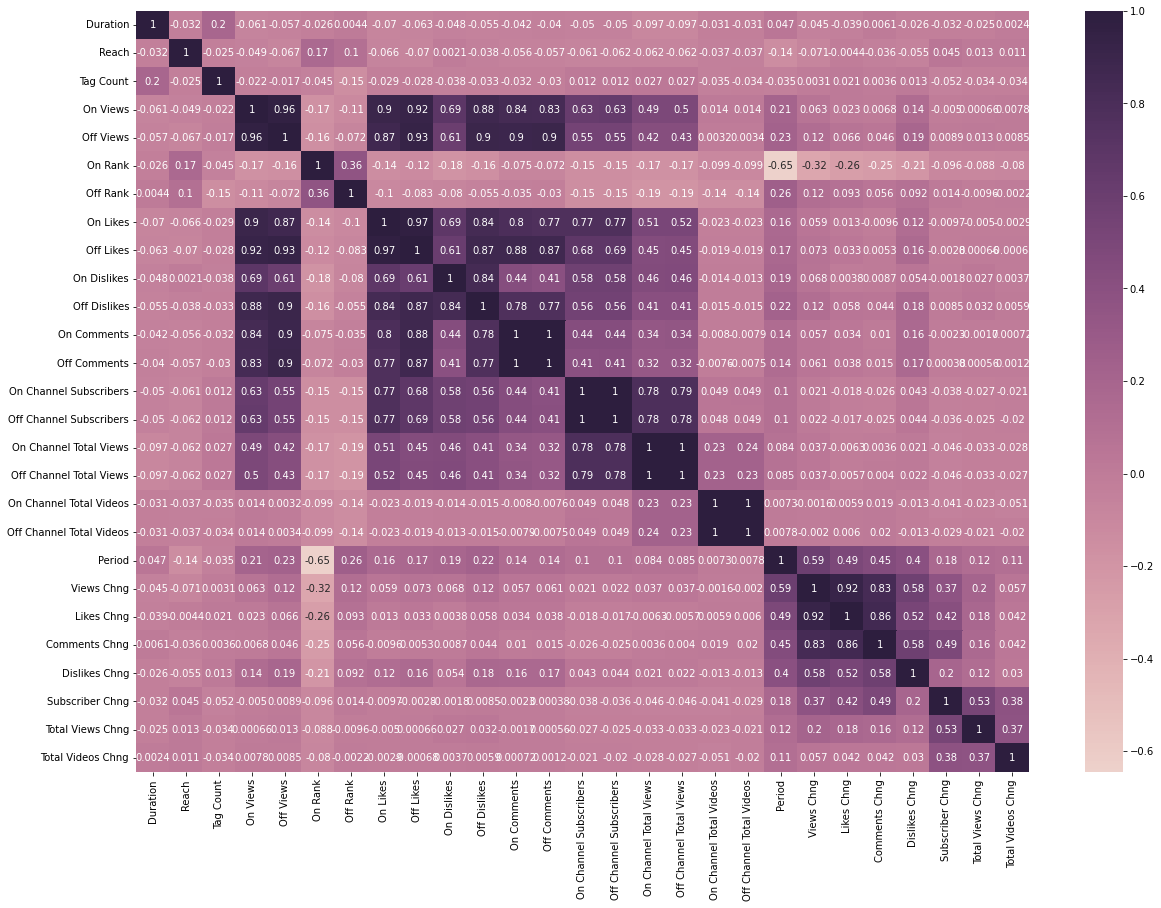

In [ ]:
#각 칼럼들 사이의 상관관계
h_labels = [x.replace('_', ' ').title() for x in 
            list(q2_dataset.select_dtypes(include=['number', 'bool']).columns.values)]

fig, ax = plt.subplots(figsize=(20,14))
_ = sns.heatmap(q2_dataset.corr(), annot=True, xticklabels=h_labels, yticklabels=h_labels, cmap=sns.cubehelix_palette(as_cmap=True), ax=ax)

tag_count의 경우 그 어떠한 요소와도 상관관계가 존재하지 않는다.(거의 0에 수렴)
on_views(처음 기록된 조회수)의 경우 off_views와 가장 높은 상관관계가 있지만 개념상 반대이므로(이는 on-off 짝이 있는 모든 경우에 해당됨) 당연히 상관관계가 있을 것이라 예상하여 개념상 반대인 칼럼은 신경쓰지 않겠다. on/off_likes와 on/off_comments, on_dislikes에서 강한 상관관계를 보이며 그 다음은 off_dislike, on/off_channel_subscribers에서 약한 상관관계를 보이고 있다.
off_views의 경우 on/off_likes,off_dislikes,on/off_comments에서 강한 상관관계를 보이며 on_dislikes의 경우 다소 약한 상관관계를 보이고 있다.
on/off_ranks의 경우 거의 0.1대의 상관성을 보이기에 상관관계가 없다고 파악.
on/off_likes의 경우, on/off_comments와 on/off_dislikes에서 상관관계를 보이고 있다.
off_dislikes의 경우, on/off_comments와 상관관계가 형성된 반면, on_dislikes는 다른 요소와는 아주 약한 상관관계를 보이고 있다.
on/off_channel_subscribers의 경우 on/off_channel_total_views와 약한 상관관계를 띄고 있다.

In [ ]:
#상위권 하위권으로 0, 1로 구분을 해준다.
#카테고리의 경우 15개가 존재하고, 범주형 데이터이기 때문에 원핫인코딩 처리
le=LabelEncoder()
bin_names = ['상위권','하위권']
q2_dataset['on_rank_bin'] = pd.cut(x = q2_dataset['on_rank'], #데이터 배열
                     bins = [ 1, 25.5, 50. ],    #경계값 리스트
                     labels = bin_names,     #구간명
                     include_lowest = True)  # 첫 경계값 포함여부(구간의 하위값)
q2_dataset['on_rank_bin']=le.fit_transform(q2_dataset['on_rank_bin'])
q2_dataset=pd.get_dummies(q2_dataset,columns=['category_name'])

In [ ]:
q2_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 46 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   duration                             2644 non-null   int64         
 1   published_date                       2644 non-null   datetime64[ns]
 2   on_trending_date                     2644 non-null   datetime64[ns]
 3   off_trending_date                    2644 non-null   datetime64[ns]
 4   reach                                2644 non-null   int64         
 5   tag_count                            2644 non-null   int64         
 6   on_views                             2644 non-null   int64         
 7   off_views                            2644 non-null   int64         
 8   on_rank                              2644 non-null   int64         
 9   off_rank                             2644 non-null   int64         
 10  on_likes    

In [ ]:
#인기동영상 섹션에 오르기전
#on으로 시작하는 칼럼들을 이용해서 순위권에 몇등에 들어오는지 분류(상위권, 하위권)
#랜덤 포레스트를 이용할 것이므로 feature importance 를 확인할 수 있을 것으로 기대

X=q2_dataset[['reach','duration', 'tag_count', 'on_views', 'on_likes',  'on_dislikes',  'on_comments','on_channel_subscribers', 'on_channel_total_views', 'on_channel_total_videos',
              'category_name_Autos & Vehicles','category_name_Comedy', 'category_name_Education', 'category_name_Entertainment', 'category_name_Film & Animation','category_name_Gaming', 'category_name_Howto & Style',
       'category_name_Music', 'category_name_News & Politics','category_name_Nonprofits & Activism', 'category_name_People & Blogs','category_name_Pets & Animals', 'category_name_Science & Technology','category_name_Sports', 'category_name_Travel & Events']]
y=q2_dataset['on_rank_bin']


x_train, x_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)

sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [ ]:
###랜덤포레스트

## 모델의 선언
rfc = RandomForestClassifier(n_estimators=300,random_state=42, min_samples_leaf=4, min_samples_split=10, max_depth=20)
 
## 학습데이터의 모델 적용
rfc.fit(x_train, y_train)
 
## 모델의 예측값 산출
pred_rfc = rfc.predict(x_test)
 
## 다양한 모델 평가 
print(classification_report(y_test, pred_rfc))
 
## 가장 기초적인 성적 평가 지표들
print("Accuracy:", metrics.accuracy_score(y_test, pred_rfc))
print("Precision:", metrics.precision_score(y_test, pred_rfc))
print("Recall:", metrics.recall_score(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.69      0.87      0.77       333
           1       0.61      0.35      0.44       196

    accuracy                           0.67       529
   macro avg       0.65      0.61      0.61       529
weighted avg       0.66      0.67      0.65       529

Accuracy: 0.6748582230623819
Precision: 0.6071428571428571
Recall: 0.3469387755102041


In [ ]:
### 로지스틱회귀
## 모델의 선언
logistr = LogisticRegression(random_state=42)
 
## 학습데이터의 모델 적용
logistr.fit(x_train, y_train)
 
## 모델의 예측값 산출
pred_logistr = logistr.predict(x_test)
 
## 다양한 모델 평가 
print(classification_report(y_test, pred_logistr))
 
## 가장 기초적인 성적 평가 지표들
print("Accuracy:", metrics.accuracy_score(y_test, pred_logistr))
print("Precision:", metrics.precision_score(y_test, pred_logistr))
print("Recall:", metrics.recall_score(y_test, pred_logistr))

              precision    recall  f1-score   support

           0       0.67      0.94      0.78       333
           1       0.66      0.20      0.31       196

    accuracy                           0.67       529
   macro avg       0.66      0.57      0.55       529
weighted avg       0.66      0.67      0.61       529

Accuracy: 0.665406427221172
Precision: 0.6557377049180327
Recall: 0.20408163265306123


In [ ]:
## 모델의 선언
svc = SVC(kernel='sigmoid',class_weight='balanced',random_state=42)
 
## 학습데이터의 모델 적용
svc.fit(x_train, y_train)
 
## 모델의 예측값 산출
pred_svc = svc.predict(x_test)
 
## 다양한 모델 평가 
print(classification_report(y_test, pred_svc))
 
## 가장 기초적인 성적 평가 지표들
print("Accuracy:", metrics.accuracy_score(y_test, pred_svc))
print("Precision:", metrics.precision_score(y_test, pred_svc))
print("Recall:", metrics.recall_score(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.75      0.54      0.63       333
           1       0.47      0.69      0.56       196

    accuracy                           0.60       529
   macro avg       0.61      0.62      0.59       529
weighted avg       0.65      0.60      0.60       529

Accuracy: 0.5973534971644613
Precision: 0.47038327526132406
Recall: 0.6887755102040817


In [ ]:
##svc에서 중요도를 추출하려면 kernel이 'linear'여야 함. 
#'sigmoid'일 때 성능이 좋아서 도전
## 모델의 선언
svc = SVC(kernel='linear',class_weight='balanced',random_state=42)
 
## 학습데이터의 모델 적용
svc.fit(x_train, y_train)
 
## 모델의 예측값 산출
pred_svc = svc.predict(x_test)
 
## 다양한 모델 평가 
print(classification_report(y_test, pred_svc))
 
## 가장 기초적인 성적 평가 지표들
print("Accuracy:", metrics.accuracy_score(y_test, pred_svc))
print("Precision:", metrics.precision_score(y_test, pred_svc))
print("Recall:", metrics.recall_score(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.80      0.40      0.53       333
           1       0.45      0.84      0.58       196

    accuracy                           0.56       529
   macro avg       0.63      0.62      0.56       529
weighted avg       0.67      0.56      0.55       529

Accuracy: 0.5595463137996219
Precision: 0.44931506849315067
Recall: 0.8367346938775511


In [ ]:
###의사결정나무
## 모델의 선언
dtc = tree.DecisionTreeClassifier(random_state=42, min_samples_leaf=2, min_samples_split=2, max_depth=5)
 
## 학습데이터의 모델 적용
dtc.fit(x_train, y_train)
 
## 모델의 예측값 산출
pred_dtc = dtc.predict(x_test)
 
## 다양한 모델 평가 
print(classification_report(y_test, pred_dtc))
 
## 가장 기초적인 성적 평가 지표들
print("Accuracy:", metrics.accuracy_score(y_test, pred_dtc))
print("Precision:", metrics.precision_score(y_test, pred_dtc))
print("Recall:", metrics.recall_score(y_test, pred_dtc))

              precision    recall  f1-score   support

           0       0.64      0.88      0.74       333
           1       0.43      0.16      0.23       196

    accuracy                           0.61       529
   macro avg       0.53      0.52      0.49       529
weighted avg       0.56      0.61      0.55       529

Accuracy: 0.610586011342155
Precision: 0.4305555555555556
Recall: 0.15816326530612246


In [ ]:
### knn
## 모델의 선언
knn = KNeighborsClassifier(n_neighbors=4)
 
## 학습데이터의 모델 적용
knn.fit(x_train, y_train)
 
## 모델의 예측값 산출
pred_knn = knn.predict(x_test)
 
## 다양한 모델 평가 
print(classification_report(y_test, pred_knn))
 
## 가장 기초적인 성적 평가 지표들
print("Accuracy:", metrics.accuracy_score(y_test, pred_knn))
print("Precision:", metrics.precision_score(y_test, pred_knn))
print("Recall:", metrics.recall_score(y_test, pred_knn))

              precision    recall  f1-score   support

           0       0.65      0.88      0.75       333
           1       0.48      0.19      0.28       196

    accuracy                           0.62       529
   macro avg       0.56      0.54      0.51       529
weighted avg       0.59      0.62      0.57       529

Accuracy: 0.6238185255198487
Precision: 0.4810126582278481
Recall: 0.19387755102040816


In [ ]:
## 모델의 선언
gnb = GaussianNB()
 
## 학습데이터의 모델 적용
gnb.fit(x_train, y_train)
 
## 모델의 예측값 산출
pred_gnb = gnb.predict(x_test)
 
## 다양한 모델 평가 
print(classification_report(y_test, pred_gnb))
 
## 가장 기초적인 성적 평가 지표들
print("Accuracy:", metrics.accuracy_score(y_test, pred_gnb))
print("Precision:", metrics.precision_score(y_test, pred_gnb))
print("Recall:", metrics.recall_score(y_test, pred_gnb))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       333
           1       0.37      1.00      0.54       196

    accuracy                           0.37       529
   macro avg       0.19      0.50      0.27       529
weighted avg       0.14      0.37      0.20       529

Accuracy: 0.3705103969754253
Precision: 0.3705103969754253
Recall: 1.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Feature Ranking:
1. feature on_views (0.165)
2. feature on_dislikes (0.132)
3. feature on_comments (0.108)
4. feature on_likes (0.103)
5. feature on_channel_total_views (0.095)
6. feature on_channel_total_videos (0.092)
7. feature on_channel_subscribers (0.090)
8. feature duration (0.086)
9. feature tag_count (0.067)
10. feature reach (0.023)
11. feature category_name_Entertainment (0.011)
12. feature category_name_People & Blogs (0.008)
13. feature category_name_Sports (0.004)
14. feature category_name_Comedy (0.003)
15. feature category_name_Music (0.003)
16. feature category_name_Howto & Style (0.002)
17. feature category_name_News & Politics (0.002)
18. feature category_name_Pets & Animals (0.002)
19. feature category_name_Film & Animation (0.002)
20. feature category_name_Gaming (0.002)
21. feature category_name_Education (0.001)
22. feature category_name_Autos & Vehicles (0.001)
23. feature category_name_Travel & Events (0.000)
24. feature category_name_Science & Technology (0.00

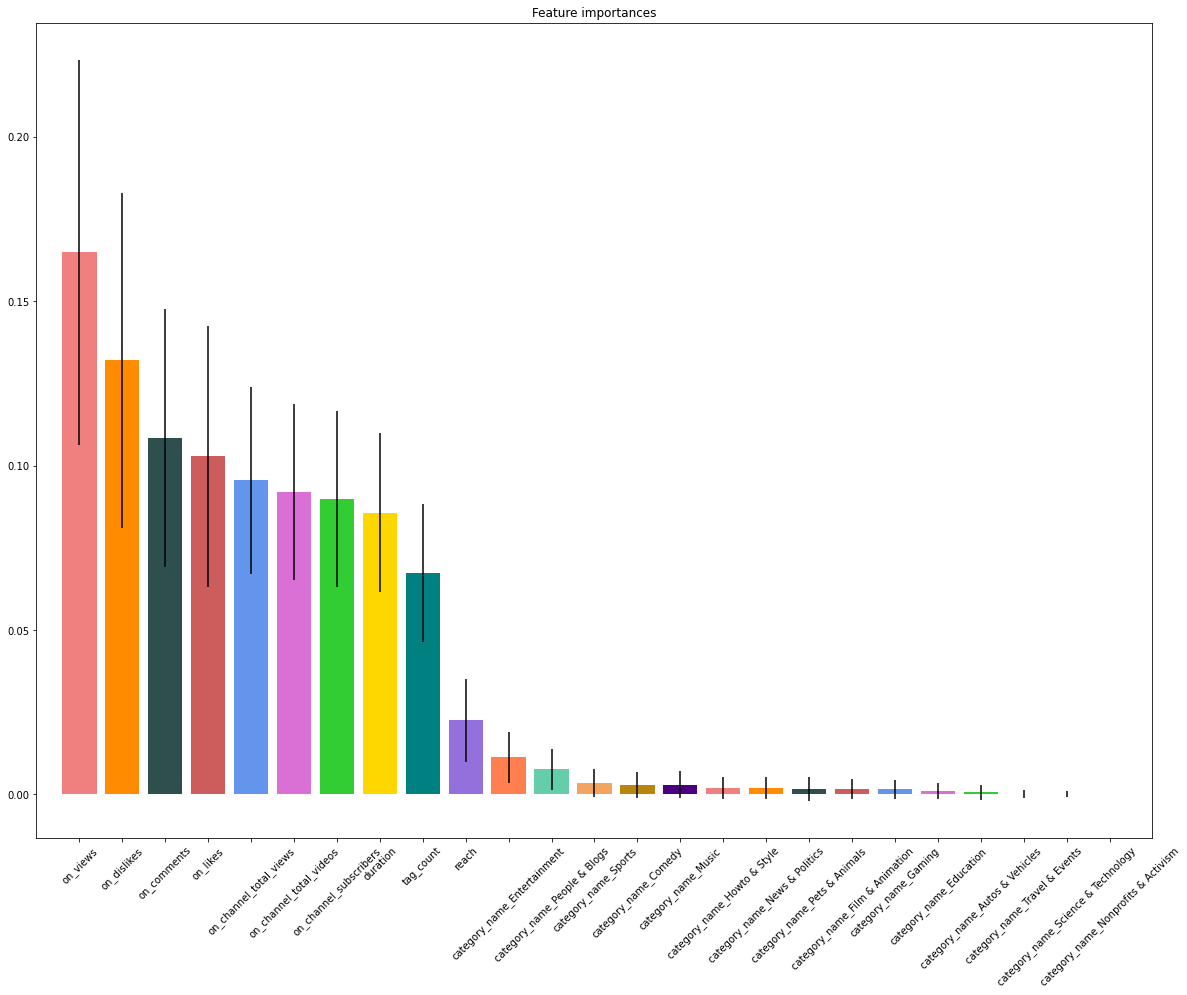

In [ ]:
#Gini impurity 기반으로 한 feature importance
importances=rfc.feature_importances_
std=np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)
indices=np.argsort(importances)[::-1]

print("Feature Ranking:")
for f in range(X.shape[1]):
  print("{}. feature {} ({:.3f})".format(f+1, X.columns[indices][f],importances[indices[f]]))

plt.figure(figsize=(20,15))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color=colors, yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]),X.columns[indices],rotation=45)
plt.xlim([-1,X.shape[1]])
plt.show()

In [ ]:
perm = PermutationImportance(rfc, scoring = "accuracy", random_state = 42).fit(x_test, y_test) 
eli5.show_weights(perm, top = 25, feature_names = X.columns.tolist())


Weight,Feature
0.0469 ± 0.0213,on_views
0.0272 ± 0.0130,on_dislikes
0.0121 ± 0.0137,duration
0.0117 ± 0.0097,reach
0.0113 ± 0.0093,on_channel_total_videos
0.0091 ± 0.0108,tag_count
0.0083 ± 0.0195,on_channel_total_views
0.0019 ± 0.0034,category_name_Entertainment
0.0015 ± 0.0028,category_name_Sports
0.0011 ± 0.0030,category_name_Comedy


특성 추출을 통해서 인기 영상에 도달하기 까지 on_view와 on_dislike, reach(업로드 후 도달 기간), tag의 수, on_channel_total_view/vidoes가 긍정적인 영향을 미친다는 것을 알 수 있었다.의외로 카테고리가 on_likes/comments/channel_subscribers가 중요하지 않음을 마지막 permutation feature 계산을 통해 알 수 있었다.

In [ ]:
q2_dataset['offOn_views']=q2_dataset['off_views']-q2_dataset['on_views']
q2_dataset_2=q2_dataset.copy()

In [ ]:
def outlier_iqr(data, column): 

    # lower, upper 글로벌 변수 선언하기     
    global lower, upper    
    
    # 4분위수 기준 지정하기     
    q25, q75 = np.quantile(data[column], 0.25), np.quantile(data[column], 0.75)          
    
    # IQR 계산하기     
    iqr = q75 - q25    
    
    # outlier cutoff 계산하기     
    cut_off = iqr * 1.5          
    
    # lower와 upper bound 값 구하기     
    lower, upper = q25 - cut_off, q75 + cut_off     
    
    print('IQR은',iqr, '이다.')     
    print('lower bound 값은', lower, '이다.')     
    print('upper bound 값은', upper, '이다.')    
    
    # 1사 분위와 4사 분위에 속해있는 데이터 각각 저장하기     
    data1 = data[data[column] > upper]     
    data2 = data[data[column] < lower]    
    
    # 이상치 총 개수 구하기
    return print('총 이상치 개수는', data1.shape[0] + data2.shape[0], '이다.')
    
col_list=[
       'reach', 'on_views', 'off_views', 'on_likes', 'off_likes', 'on_dislikes', 'off_dislikes', 'on_comments','off_comments', 'on_channel_subscribers', 'off_channel_subscribers','on_channel_total_views', 'off_channel_total_views','on_channel_total_videos', 'off_channel_total_videos', 'total_views_chng', 'total_videos_chng','offOn_views']
for col in col_list:
    outlier_iqr(q2_dataset_2,col)

IQR은 0.0 이다.
lower bound 값은 2.0 이다.
upper bound 값은 2.0 이다.
총 이상치 개수는 407 이다.
IQR은 591528.0 이다.
lower bound 값은 -651940.0 이다.
upper bound 값은 1714172.0 이다.
총 이상치 개수는 237 이다.
IQR은 812644.75 이다.
lower bound 값은 -912113.125 이다.
upper bound 값은 2338465.875 이다.
총 이상치 개수는 235 이다.
IQR은 12675.0 이다.
lower bound 값은 -14804.0 이다.
upper bound 값은 35896.0 이다.
총 이상치 개수는 344 이다.
IQR은 15926.75 이다.
lower bound 값은 -18957.375 이다.
upper bound 값은 44749.625 이다.
총 이상치 개수는 340 이다.
IQR은 229.0 이다.
lower bound 값은 -257.5 이다.
upper bound 값은 658.5 이다.
총 이상치 개수는 281 이다.
IQR은 327.0 이다.
lower bound 값은 -382.5 이다.
upper bound 값은 925.5 이다.
총 이상치 개수는 281 이다.
IQR은 2209.0 이다.
lower bound 값은 -2802.5 이다.
upper bound 값은 6033.5 이다.
총 이상치 개수는 301 이다.
IQR은 2553.0 이다.
lower bound 값은 -3231.75 이다.
upper bound 값은 6980.25 이다.
총 이상치 개수는 299 이다.
IQR은 1124500.0 이다.
lower bound 값은 -1538750.0 이다.
upper bound 값은 2959250.0 이다.
총 이상치 개수는 276 이다.
IQR은 1131750.0 이다.
lower bound 값은 -1546875.0 이다.
upper bound 값은 2980125.0 이다.
총 이상치 개수는 274 이다.
IQR은 4487

In [ ]:
def del_outlier_iqr(data, column): 

    # lower, upper 글로벌 변수 선언하기     
    global lower, upper    
    
    # 4분위수 기준 지정하기     
    q25, q75 = np.quantile(data[column], 0.25), np.quantile(data[column], 0.75)          
    
    # IQR 계산하기     
    iqr = q75 - q25    
    
    # outlier cutoff 계산하기     
    cut_off = iqr * 1.5          
    
    # lower와 upper bound 값 구하기     
    upper =  q75 + cut_off     
    
    
    # 1사 분위와 4사 분위에 속해있는 데이터 각각 저장하기     
    uppercond = data[data[column] > upper].index     
   
    
    # 이상치 삭제하기
    return data.drop(uppercond,inplace=True)
col_list=[
       'reach', 'on_views', 'off_views', 'on_likes', 'off_likes', 'on_dislikes', 'off_dislikes', 'on_comments','off_comments', 'on_channel_subscribers', 'off_channel_subscribers','on_channel_total_views', 'off_channel_total_views','on_channel_total_videos', 'off_channel_total_videos', 'total_views_chng', 'total_videos_chng','offOn_views']
for col in col_list:
    del_outlier_iqr(q2_dataset_2,col)
q2_dataset_2.reset_index(inplace=True)
q2_dataset_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581 entries, 0 to 580
Data columns (total 49 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   index                                581 non-null    int64         
 1   duration                             581 non-null    int64         
 2   published_date                       581 non-null    datetime64[ns]
 3   on_trending_date                     581 non-null    datetime64[ns]
 4   off_trending_date                    581 non-null    datetime64[ns]
 5   reach                                581 non-null    int64         
 6   tag_count                            581 non-null    int64         
 7   on_views                             581 non-null    int64         
 8   off_views                            581 non-null    int64         
 9   on_rank                              581 non-null    int64         
 10  off_rank      

In [ ]:
#인기동영상 섹션에 오르고 내려가기까지의 값
#상관관계를 분석한 그래프를 참고하였을 때 각종 증가율과 다른 컬럼들 간의 상관관계가 아주 약하게 집계됨. 
#성장률: 채널 구독자 수 증가율, 해당 영상의 조회수 증가율, 좋아요의 증가율, 싫어요의 증가율, 댓글 증가율, 채널 자체의 총 조회수 증가율, 채널 자체의 동영상 증가율
#따라서, 가운데 가장 진한 관계들에 대해서 분석해보려 함.
#기존의 칼럼들을 이용해, off_views-on_views를 한 값에 대한 분류 분석 진행(회귀 분석은 하기에 어려움이 있음....)
#랜덤 포레스트를 이용할 것이므로 feature importance 를 확인할 수 있을 것으로 기대

x_2=q2_dataset_2[['duration','on_likes', 'off_likes', 'on_dislikes','off_dislikes', 'on_comments', 'off_comments', 'on_channel_subscribers',
       'off_channel_subscribers', 'on_channel_total_views','off_channel_total_views', 'on_channel_total_videos','off_channel_total_videos', 'period',
       'category_name_Autos & Vehicles','category_name_Comedy', 'category_name_Education', 'category_name_Entertainment', 'category_name_Film & Animation','category_name_Gaming', 'category_name_Howto & Style',
       'category_name_Music', 'category_name_News & Politics','category_name_Nonprofits & Activism', 'category_name_People & Blogs','category_name_Pets & Animals', 'category_name_Science & Technology','category_name_Sports', 'category_name_Travel & Events']]
y_2=q2_dataset_2['offOn_views'].values

x_train2, x_test2, y_train2, y_test2 = train_test_split(x_2,y_2, test_size=0.2, random_state=42)
print(x_train2.shape)

sc=StandardScaler()
x_train2=sc.fit_transform(x_train2)
x_test2=sc.fit_transform(x_test2)

(464, 29)


In [ ]:
###Random Forest Regressor

rfc2 = RandomForestRegressor(n_estimators=300,random_state=42, max_depth=2)
 
## 학습데이터의 모델 적용
rfc2.fit(x_train2, y_train2)
 
## 모델의 예측값 산출
pred_rfc2 = rfc2.predict(x_test2)
 
 
## 가장 기초적인 성적 평가 지표들
print("mean_squared_error:", mean_squared_error(y_test2, pred_rfc2))
print("r2_score:", r2_score(y_test2, pred_rfc2))
print("mean_absolute_error:", mean_absolute_error(y_test2, pred_rfc2))

mean_squared_error: 964353358.87643
r2_score: 0.7236534809541156
mean_absolute_error: 16983.72904733229


In [ ]:
### Lasso

la=Lasso(random_state=42,alpha=0.01)

## 학습데이터의 모델 적용
la.fit(x_train2, y_train2)
 
## 모델의 예측값 산출
pred_la = la.predict(x_test2)
 
## 가장 기초적인 성적 평가 지표들
print("mean_squared_error:", mean_squared_error(y_test2, pred_la))
print("r2_score:", r2_score(y_test2, pred_la))
print("mean_absolute_error:", mean_absolute_error(y_test2, pred_la))

mean_squared_error: 836839152.4438063
r2_score: 0.760194139782338
mean_absolute_error: 18031.357317821403


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.003e+10, tolerance: 1.399e+08
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [ ]:
###Ridge 

rd=Ridge(random_state=42,alpha=0.01)

## 학습데이터의 모델 적용
rd.fit(x_train2, y_train2)
 
## 모델의 예측값 산출
pred_rd = rd.predict(x_test2)
 
## 가장 기초적인 성적 평가 지표들
print("mean_squared_error:", mean_squared_error(y_test2, pred_rd))
print("r2_score:", r2_score(y_test2, pred_rd))
print("mean_absolute_error:", mean_absolute_error(y_test2, pred_rd))

mean_squared_error: 803036793.2244762
r2_score: 0.7698805936322876
mean_absolute_error: 17668.19231942281


In [ ]:
### ElasticNet(Lasso+Ridge)

en=ElasticNet(random_state=42,alpha=0.01)

## 학습데이터의 모델 적용
en.fit(x_train2, y_train2)
 
## 모델의 예측값 산출
pred_en = en.predict(x_test2)
 
## 가장 기초적인 성적 평가 지표들
print("mean_squared_error:", mean_squared_error(y_test2, pred_en))
print("r2_score:", r2_score(y_test2, pred_en))
print("mean_absolute_error:", mean_absolute_error(y_test2, pred_en))

mean_squared_error: 718099048.5522678
r2_score: 0.7942204788618268
mean_absolute_error: 17030.893646194054


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.354e+09, tolerance: 1.399e+08
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Lasso가 현재 가장 설명계수(r2_score)가 높다. Lasso에서 feature importance를 확인하기로 결정하였다.

In [ ]:
import eli5
eli5.show_weights(en, top=-1, feature_names = x_2.columns.tolist())

Weight?,Feature
+72986.632,off_likes
+48625.184,off_comments
+45654.228,<BIAS>
+35933.920,off_dislikes
+21063.150,period
+4025.268,off_channel_total_views
+3032.550,category_name_Science & Technology
+2653.861,off_channel_subscribers
+1469.539,category_name_Entertainment
+1269.514,duration


Feature Ranking:
1. feature off_likes (72986.632)
2. feature on_likes (67415.291)
3. feature off_comments (48625.184)
4. feature on_comments (46487.134)
5. feature off_dislikes (35933.920)
6. feature on_dislikes (29008.680)
7. feature period (21063.150)
8. feature off_channel_total_views (4025.268)
9. feature category_name_Science & Technology (3032.550)
10. feature off_channel_subscribers (2653.861)
11. feature off_channel_total_videos (1657.764)
12. feature on_channel_total_videos (1598.726)
13. feature category_name_Music (1579.264)
14. feature category_name_Education (1491.767)
15. feature category_name_Entertainment (1469.539)
16. feature duration (1269.514)
17. feature category_name_Travel & Events (1050.670)
18. feature category_name_People & Blogs (1031.486)
19. feature on_channel_total_views (995.044)
20. feature category_name_Howto & Style (932.213)
21. feature category_name_Pets & Animals (616.910)
22. feature category_name_Sports (591.253)
23. feature category_name_Comedy (

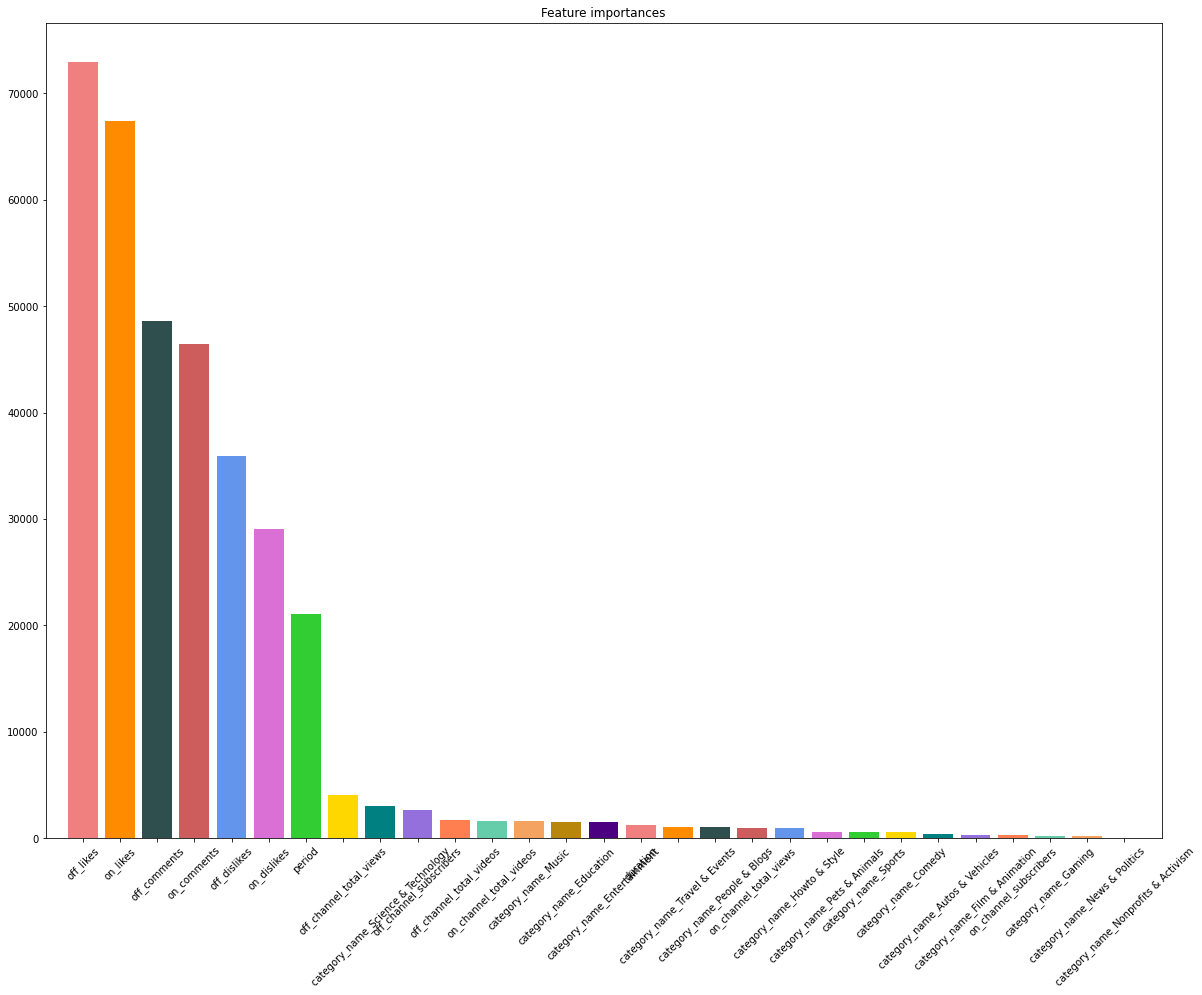

In [ ]:
#Gini impurity 기반으로 한 feature importance
importances2 = np.abs(en.coef_)
feature_names = np.array(x_2.columns)
indices=np.argsort(importances2)[::-1]

print("Feature Ranking:")
for f in range(x_2.shape[1]):
  print("{}. feature {} ({:.3f})".format(f+1, x_2.columns[indices][f],importances2[indices[f]]))

plt.figure(figsize=(20,15))
plt.title("Feature importances")
plt.bar(range(x_2.shape[1]), importances2[indices], color=colors, align="center")
plt.xticks(range(x_2.shape[1]),x_2.columns[indices],rotation=45)
plt.xlim([-1,x_2.shape[1]])
plt.show()

In [ ]:
from eli5.sklearn import PermutationImportance
perm2 = PermutationImportance(en, scoring = "r2", random_state = 42).fit(x_test2, y_test2) 
eli5.show_weights(perm2, top = 31, feature_names = x_2.columns.tolist())

Weight,Feature
2.9987 ± 0.4780,off_likes
2.7981 ± 0.5733,on_likes
1.3908 ± 0.2238,off_comments
1.1792 ± 0.3569,on_comments
0.7514 ± 0.1158,off_dislikes
0.4383 ± 0.0719,on_dislikes
0.3098 ± 0.0965,period
0.0051 ± 0.0043,off_channel_total_videos
0.0032 ± 0.0086,off_channel_total_views
0.0030 ± 0.0035,on_channel_total_videos
